<a href="https://colab.research.google.com/github/greenday1234/AI/blob/main/AudioPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import

In [20]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt
import os
import sklearn
import warnings
warnings.filterwarnings('ignore', module='sklearn')

### Display Waveform

<ipython-input-25-eb0a806c1f7d>:11: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


읽은 오디오 파일 수: 378


<ipython-input-25-eb0a806c1f7d>:17: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, sample_rate = librosa.load(file_path, sr=16000)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


MFCCs shape :  (100, 3058)
pad shape :  (100, 500)


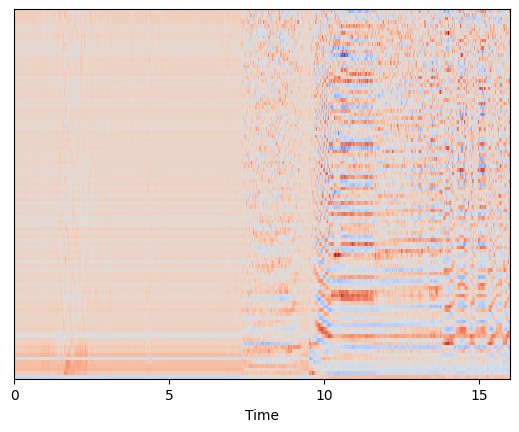

In [25]:
hop_length = 160
n_fft = 400

file_path = "/content/drive/MyDrive/Data"

audio_data = []
for root, dirs, files in os.walk(file_path):
    for file in files:
        if file.endswith('.wav') or file.endswith('.mp3'):
            file_path = os.path.join(root, file)
            y, sr = librosa.load(file_path, sr=None)
            audio_data.append((file_path, y, sr))

print("읽은 오디오 파일 수:", len(audio_data))

for file_path, signal, sample_rate in audio_data:
    signal, sample_rate = librosa.load(file_path, sr=16000)
    MFCCs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=100)
    MFCCs = sklearn.preprocessing.scale(MFCCs, axis=1)
    pad2d = lambda a, i: a[:, 0:i] if a.shape[1] > i else np.hstack((a, np.zeros((a.shape[0], i-a.shape[1]))))
    padded_mfcc = pad2d(MFCCs, 500)

print("MFCCs shape : ", MFCCs.shape)
print("pad shape : ", padded_mfcc.shape)
librosa.display.specshow(padded_mfcc, sr=16000, x_axis='time')